# SBU CSE 352 - HW 1 -  Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

---

All student names in group: Dong Liang, Kevin Zheng, Hojat Jaffary

I understand that my submission needs to be my own group's work: DL, KZ, HJ

I understand that ChatGPT / Copilot / other AI tools are not allowed: DL, KZ, HJ

## Instructions

Total Points: 100

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Only use standard packages (numpy, scipy, and built-in packages like random). Submit the completely rendered notebook as a HTML file.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
import numpy as np

class Simple_Randomized_Agent:
  def __init__(self):
    pass
  def action(self, bumpers, dirty, n = 5):
    return np.random.choice(["north", "east", "west", "south", "suck"])

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent = Simple_Randomized_Agent()
simple_randomized_agent.action(bumpers, dirty)

'west'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent.action(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_randomized_agent = Simple_Randomized_Agent()
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: south
step 1 - action: west
step 2 - action: west
step 3 - action: north
step 4 - action: east
step 5 - action: suck
step 6 - action: south
step 7 - action: south
step 8 - action: west
step 9 - action: south
step 10 - action: east
step 11 - action: north
step 12 - action: east
step 13 - action: west
step 14 - action: west
step 15 - action: east
step 16 - action: south
step 17 - action: north
step 18 - action: south
step 19 - action: south


1

# Tasks

## General [10 Points]

1. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design, for example. If it makes your code more simple objects are okay, but try to keep the code as simple as possible.
2. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
3. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
import random

# Function to print dirty room
def print_dirty_room(room):
  for i in room:
    row = ""
    for j in i:
      if(j == True):
        row += "DIRTY "
      else:
        row += "CLEAN "
    print(row)

# Function to print agent location
def print_agent_location(location):
  print("Agent is at row {0}, column {1}".format(location["row"], location["column"]))

# Function for the environment
def simple_environment(agent, n = 5, verbose = True, max_steps = 100000):

  # Initialize agent's position
  agent_position = {"row": random.randint(0, n-1), "column": random.randint(0, n-1)}

  # Initialize agent's sensors/bumpers
  bumpers = { "north" : False, "south" : False, "west" : False, "east" : False }
  if(agent_position["row"] == 0):
    bumpers["north"] = True
  if(agent_position["row"] == n-1):
    bumpers["south"] = True
  if(agent_position["column"] == 0):
    bumpers["west"] = True
  if(agent_position["column"] == n-1):
    bumpers["east"] = True

  # Initialize environment with probability(dirt) = 0.2 where True = dirty and False = clean
  dirty = []
  for i in range(n):
    row = []
    for j in range(n):
      if(random.random() < 0.2):
        row.append(True)
      else:
        row.append(False)
    dirty.append(row)

  # Define performance measure (in this case it's the number of energy unit used)
  energy_used = 0

  # Simulate environment
  while(any(True in row for row in dirty) and energy_used < max_steps):

    # Retrieve agent's action
    action = agent.action(bumpers, dirty[agent_position["row"]][agent_position["column"]], n)

    # Update environment based on agent's action
    if(action == "suck"):
      dirty[agent_position["row"]][agent_position["column"]] = False

    if(action == "north"):
      if(agent_position["row"] <= 1):
        agent_position["row"] = 0
        bumpers["north"] = True
      elif(agent_position["row"] == n-1):
        agent_position["row"] = agent_position["row"] - 1
        bumpers["south"] = False
      else:
        agent_position["row"] = agent_position["row"] - 1

    if(action == "south"):
      if(agent_position["row"] >= n-2):
        agent_position["row"] = n-1
        bumpers["south"] = True
      elif(agent_position["row"] == 0):
        agent_position["row"] = agent_position["row"] + 1
        bumpers["north"] = False
      else:
        agent_position["row"] = agent_position["row"] + 1

    if(action == "west"):
      if(agent_position["column"] <= 1):
        agent_position["column"] = 0
        bumpers["west"] = True
      elif(agent_position["column"] == n-1):
        agent_position["column"] = agent_position["column"] - 1
        bumpers["east"] = False
      else:
        agent_position["column"] = agent_position["column"] - 1

    if(action == "east"):
      if(agent_position["column"] >= n-2):
        agent_position["column"] = n-1
        bumpers["east"] = True
      elif(agent_position["column"] == 0):
        agent_position["column"] = agent_position["column"] + 1
        bumpers["west"] = False
      else:
        agent_position["column"] = agent_position["column"] + 1

    # Print current action
    if(verbose):
      print("step ", energy_used, " - action : ", action)

    # Update variable for performance measure
    energy_used = energy_used + 1

  return energy_used

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [ ]:
# Your code and description goes here
class Simple_Reflex_Agent:
  def __init__(self):
    pass

  def action(self, bumper, current_tile_dirty, n):
    if(current_tile_dirty): # Prioritize cleaning current tile if dirty
      return "suck"
    elif(bumper["north"] and bumper["west"]): # Disallow actions: "north" and "west" if corresponding bumper is True
      return random.choice(["south","east"])
    elif(bumper["south"] and bumper["west"]): # Disallow actions: "south" and "west" if corresponding bumper is True
      return random.choice(["north","east"])
    elif(bumper["north"] and bumper["east"]): # Disallow actions: "north" and "east" if corresponding bumper is True
      return random.choice(["south","west"])
    elif(bumper["south"] and bumper["east"]): # Disallow actions: "south" and "east" if corresponding bumper is True
      return random.choice(["north","west"])
    elif(bumper["north"]): # Disallow actions: "north" if corresponding bumper is True
      return random.choice(["south","west","east"])
    elif(bumper["south"]): # Disallow actions: "south" if corresponding bumper is True
      return random.choice(["north","west","east"])
    elif(bumper["east"]): # Disallow actions: "east" if corresponding bumper is True
      return random.choice(["north","west","south"])
    elif(bumper["west"]): # Disallow actions: "west" if corresponding bumper is True
      return random.choice(["north","south","east"])
    else: # Allow all actions if none of the bumper is True
      return random.choice(["north","south","east","west"])

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

## Description of my Model_Based_Reflex_Agent

 The agent has the following state:

 * `location` - to keep track of the current location, -1 if unknown
 * `last_action` - the lastest action (excluding suck) performed, only recorded if location is known

### How will the agent work?
 1. The agent will prioritize going to the North West corner in order to get ts location,
    it will know to perform to this step if location contains -1
 2. Once the location is known, it will execute actions in the following order:
    1. if current square is dirty then suck
    2. if last_action is undefined, go east
    3. if last_action is west or east and the same action is not allowed due to bumpers then go south
    4. if last_action is south, go east or west, whichever is allowed by the bumper
    5. follow last_action

By following the steps above, the agent will, starting from North West, go to the right until not possible to clear the row, then down one space then to the left until not possible to clear next row then down and repeat, forming a snake-like path

In [ ]:
# Your code goes here
class Model_Based_Reflex_Agent:

  # Define states
  def __init__(self):
    self.location = [-1,-1]
    self.last_action = None

  def action(self, bumper, current_tile_dirty, n):
    if(self.location == [-1,-1]): # If agent don't know its location
      if(bumper["north"] and bumper["west"]): # If arrived at the North West corner then update its location and recall itself
        self.location = [0,0]
        return self.action(bumper, current_tile_dirty, n)
      elif(bumper["north"]): # Go West and North if possible
        return "west"
      else:
        return "north"
    elif(current_tile_dirty): # Clean current tile if dirty
      return "suck"
    elif(self.last_action == None): # This executes ONLY once right after arriving at North West corner
      self.last_action = "east"
      return "east"
    elif((self.last_action == "east" and bumper["east"] == True) or (self.last_action == "west" and bumper["west"] == True)): # Go south when reached a wall
      self.last_action = "south"
      return "south"
    elif(self.last_action == "south" and bumper["east"] == True): # Only executes after going south, then goes west or east depending on whichever is allowed by the bumper
      self.last_action = "west"
      return "west"
    elif(self.last_action == "south" and bumper["west"] == True): # Only executes after going south, then goes west or east depending on whichever is allowed by the bumper
      self.last_action = "east"
      return "east"
    else: # Else execute same action from before
      return self.last_action

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each with 100000 max steps. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [ ]:
# Your code goes here
random_5_by_5 = []
random_10_by_10 = []
random_100_by_100 = []
for i in range (100):
  random_5_by_5.append(simple_environment(agent = Simple_Randomized_Agent(), n = 5, verbose = False, max_steps = 100000))
  random_10_by_10.append(simple_environment(agent = Simple_Randomized_Agent(), n = 10, verbose = False, max_steps = 100000))
  random_100_by_100.append(simple_environment(agent = Simple_Randomized_Agent(), n = 100, verbose = False, max_steps = 100000))

simple_5_by_5 = []
simple_10_by_10 = []
simple_100_by_100 = []
for i in range (100):
  simple_5_by_5.append(simple_environment(agent = Simple_Reflex_Agent(), n = 5, verbose = False, max_steps = 100000))
  simple_10_by_10.append(simple_environment(agent = Simple_Reflex_Agent(), n = 10, verbose = False, max_steps = 100000))
  simple_100_by_100.append(simple_environment(agent = Simple_Reflex_Agent(), n = 100, verbose = False, max_steps = 100000))

model_5_by_5 = []
model_10_by_10 = []
model_100_by_100 = []
for i in range (100):
  model_5_by_5.append(simple_environment(agent = Model_Based_Reflex_Agent(), n = 5, verbose = False, max_steps = 100000))
  model_10_by_10.append(simple_environment(agent = Model_Based_Reflex_Agent(), n = 10, verbose = False, max_steps = 100000))
  model_100_by_100.append(simple_environment(agent = Model_Based_Reflex_Agent(), n = 100, verbose = False, max_steps = 100000))


In [ ]:
# Your graphs and discussion of the results goes here
import pandas as pd
import matplotlib.pyplot as plt

data = [[
          sum(random_5_by_5)/100,
          sum(simple_5_by_5)/100,
          sum(model_5_by_5)/100
        ],
        [
          sum(random_10_by_10)/100,
          sum(simple_10_by_10)/100,
          sum(model_10_by_10)/100
        ],
        [
          sum(random_100_by_100)/100,
          sum(simple_100_by_100)/100,
          sum(model_100_by_100)/100
        ]]

pd.DataFrame(data, index = ["5x5","10x10","100x100"], columns = ["Simple Random Agent", "Simple Reflex Agent", "Model-based Reflex Agent"])

,Simple Random Agent,Simple Reflex Agent,Model-based Reflex Agent
5x5,447.88,101.52,28.97
10x10,3346.48,855.43,123.85
100x100,100000.00,100000.00,12091.24


Mean performance for 5x5:


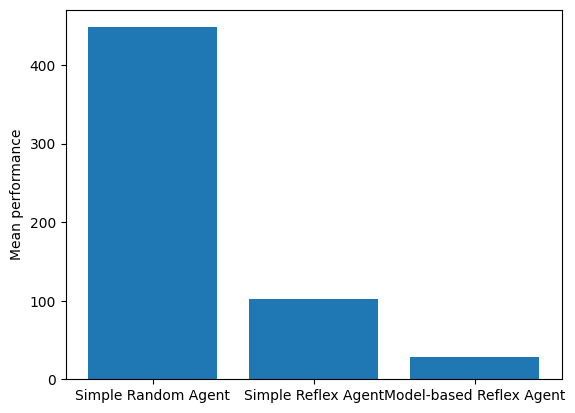


Mean performance for 10x10:


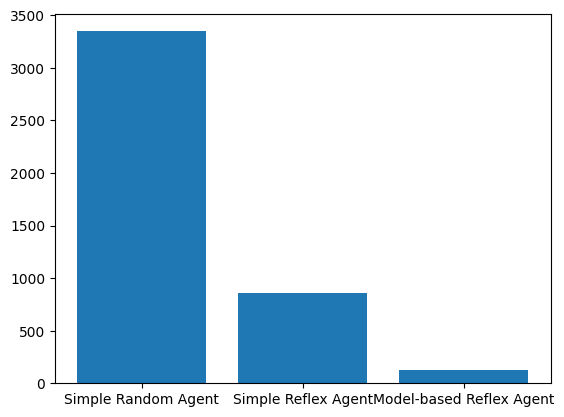


Mean performance for 100x100:


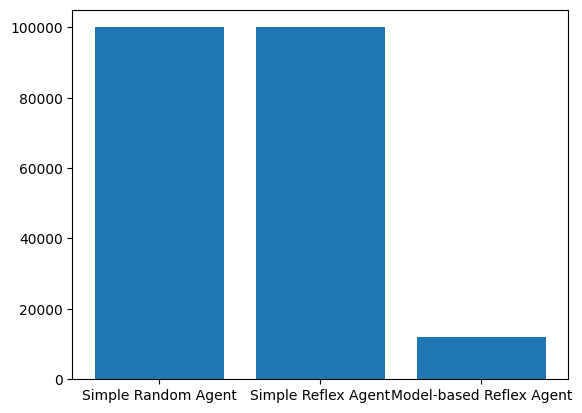

In [ ]:
performance_5_by_5 = data[0]
performance_10_by_10 = data[1]
performance_100_by_100 = data[2]

columns = ["Simple Random Agent", "Simple Reflex Agent", "Model-based Reflex Agent"]
plt.ylabel("Mean performance")

print("Mean performance for 5x5:")
plt.bar(columns, performance_5_by_5)
plt.show()

print("\nMean performance for 10x10:")
plt.bar(columns, performance_10_by_10)
plt.show()

print("\nMean performance for 100x100:")
plt.bar(columns, performance_100_by_100)
plt.show()

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

My Answer:

**1) If put into rectangular room with unknown size:**

Model_Based_Reflex_Agent:
* Will still work because by first identifying its location by going
  to the North West corner then clearing each row at a time, it guarentees
  that the room will be cleaned
* The worst run time of a unknown rectangular room of M by N is
  (M+N) + 2MN = O(MN) because (M+N) is the # of steps to get to
  North West corner, MN is the amount of steps required to travel
  across the entire rectangular room, and MN to clean each space
Simple_Reflex_Agent:
* Might work if lucky because the steps chosen by this agent is completely
  random with restrictions from the bumper, thus it can end in an infinite loop
     
**2) If the cleaning area have an irregular shape:**

Model_Based_Reflex_Agent:
* This agent will fail at this task because in cases where the room is
  not a square or rectangle because of two main reasons:
    1. The agent will very likely to incorrectly find starting location and
        thus will miss cleanining part of the room
    2. Even if the agent does manage to find the correct starting location
        it will not path through the entire shape because the agent only
        recognizes shapes with parallel width and length
        Example (X represents the shape, O represent the path taken by
        agent after it somehow finds the correct starting location):
        XXXX             OOOO
        XXXXXX           OOOOOX
Simple_Reflex_Agent:
* Might work if lucky because the steps chosen by this agent is completely
  random with restrictions from the bumper, thus it can end in an infinite loop

**3) If the room contains obstacles**
     
Model_Based_Reflex_Agent:
* The agent will fail because by adding roadblocks in the path, the agent
  doesn't recognizes it. Instead the agent will treat the roadblock as if
  it reach the end of the current row and think that the row is finished
  cleaning, thus leaving part of some rows unattended
Simple_Reflex_Agent:
* Might work if lucky because the steps chosen by this agent is completely
  random with restrictions from the bumper, thus it can end in an infinite loop


In [ ]:
TEST



---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.


In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST

In [ ]:
TEST